# Nonlinear regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Turbo charged diesel engines
A turbocharger in a diesel engine works so that a certain fraction f of the exhaust gases is routed through a small turbine which is directly connected to an air compressor (supercharger). Air compressors increase the pressure of the gas mixture entering the engine cylinder, resulting in more fuel (mixed with air) getting burned every cycle. The way to get a higher pressure rise in the supercharger is to let a larger fraction of the exhaust gases pass through the turbine. The theoretical maximum exhaust fraction $f$ is 1 but the supercharger has practical limits on how high a pressure ratio it can create.

Below is a table containing a few readings from a turbocharger unit that shows the pressure rise associated with a certain fraction number $f$. 

| Pressure ratio $r_p$ | 1.5  | 2    | 4    | 7    | 9    | 10   | 12   | 14   | 15   |
|----------------------|------|------|------|------|------|------|------|------|------|
| Exhaust fraction $f$ | 0.15 | 0.28 | 0.46 | 0.57 | 0.62 | 0.64 | 0.68 | 0.69 | 0.70 |

In [5]:
from scipy.optimize import curve_fit

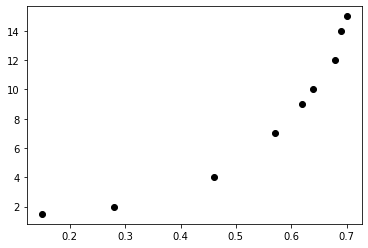

In [6]:
rpdata = np.array([1.5,2.,4.,7.,9.,10.,12.,14.,15.])
fdata = np.array([0.15,0.28,.46,.57,.62,.64,0.68,.69,.70])

plt.plot(fdata, rpdata,'ko');

### To do
- Fit with linear fit
- Fit with polynomial fit
- Fit with semilog regression - exponential fit
- Use scipy curve fit for exponential fit
- Use scipy curve fit for general power law
- Use scipy curve fit for $r_p = \frac{a}{b- f}$.

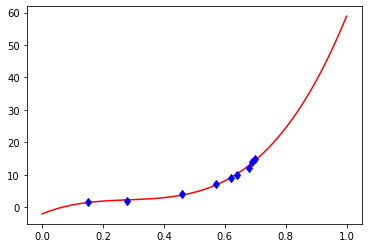

In [10]:
d, c, m,b = np.polyfit(fdata,rpdata,deg=3)

fs = np.linspace(0,1.,101)
rs = d*fs**3+ c*fs**2 + m*fs + b

plt.plot(fs,rs,'r',fdata,rpdata,'bd');
#plt.text(0.1,10,f"r = {m:2.2f}f + {b:2.2f}");


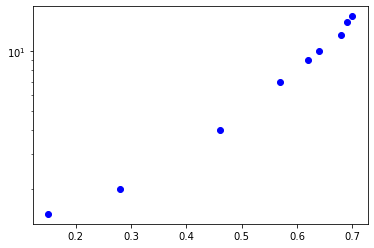

In [13]:
plt.semilogy(fdata,rpdata,'bo');

Practically, the supercharger cannot sustain a pressure ratio higher than 9. 
- Plot the given data and all your fits till that pressure, and corresponding fraction f.
- Comment on which of these is the best fit given the practical constraints and what you see in the plots


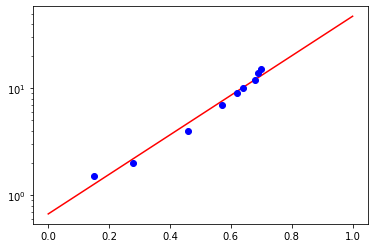

In [15]:
m, b = np.polyfit(fdata,np.log(rpdata),deg=1)

fs = np.linspace(0,1,101)
rps = np.exp(b)*np.exp(m*fs)

plt.semilogy(fs,rps,'r',fdata,rpdata,'bo');

[0.3317839  5.37568612]


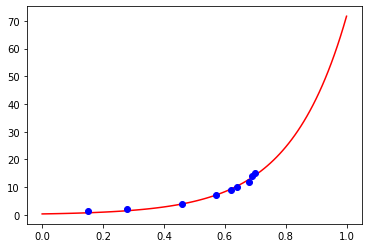

In [23]:
def modelfcn(f,A,m):
    output = A*np.exp(m*f)
    return(output)

pfit, pcov = curve_fit(modelfcn,fdata,rpdata,[1.,2.])
#pfit is the array of optimal parameter values
Afit = pfit[0]
mfit = pfit[1]

print(pfit)

fs = np.linspace(0,1,101)
rps = Afit*np.exp(mfit*fs)

plt.plot(fs,rps,'r',fdata,rpdata,'bo');

1.4986179450330834 0.7988088659268491


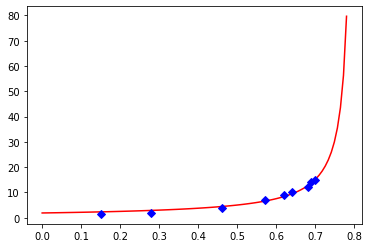

In [27]:
def nmodelfcn(f,a,b):
    output = a/(b-f)
    return(output)

pfit, pcov = curve_fit(nmodelfcn,fdata,rpdata,[1,.9])

a, b = pfit[0], pfit[1]
print(a,b)

fs = np.linspace(0,.78,101)
rps = a/(b - fs)

plt.plot(fs,rps,'r',fdata,rpdata,'bD');

### Nuclear blasts

During World War II, the British government
cooperated with the US on the development
of the atomic bomb in the Manhattan project.
G. I. Taylor, a British fluid dynamicist, was
asked by his government to study mechanical
ways of measuring the bomb’s yield (energy
output).

He didn't have direct access to the development team, but he did see the images of test explosions.

He used dimensional analysis to estimate how
the radius would scale with the other physical
variables.
From his work in fluids, Taylor assumed
the relevant variables would be:
 - $r$, the radius of the shock front.
 - $\rho$, density of surrounding air.
 - $E$, energy released by the device.
 - $t$, the time at which the front reaches $r$.

Assume the density of air $\rho = 1.25$ kg/m$^3$. Estimate the energy of a bomb using the data below.

|$t$| 0.10 | 0.52 | 1.08 | 1.5 | 1.93 | 4.07 | 15.0 | 34.0 |
|---|---|---|---|---|---|---|---|---|
|$r$| 11.1 | 28.2 | 38.9 | 44.4 | 48.7 | 64.3 | 106.5 | 145|

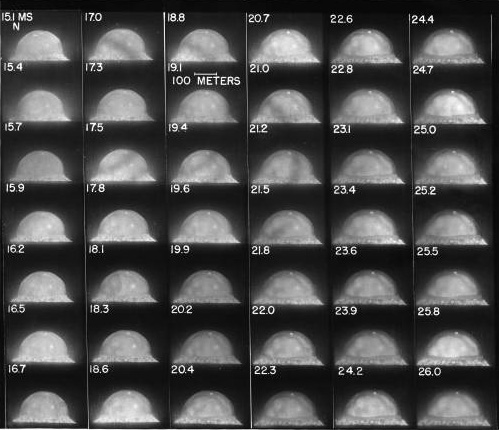

In [29]:
tdata = np.array([0.1,0.52,1.08,1.5,1.93,4.07,15.,34.])
rdata = np.array([11.1,28.2,38.9,44.4,48.7,64.3,106.5,145.])

def fcn(t,E):
    C = 1.
    rho = 1.25
    output = (C/rho)*E**(.2)*t**.4
    return(output)

pfit, pcov = curve_fit(fcn,tdata,rdata,[1e7])

E = pfit[0]

print(f"E = {E}")

E = 182929420.39601025


In [30]:
1.8E14/4.2E12

42.857142857142854